# Análise de solicitação de crédito

**Objetivo desta análise**: determinar para cada solicitação de crédito o valor de **Risk** baseado nos outros atributos (por exemplo, Age, Sex, Job, Housing, ...).

Este dataset e a descrição do problema estão disponíveis em https://www.kaggle.com/uciml/german-credit

$Risk \leftarrow Age + Sex + Job + \cdots + Purpose$

## Aquisição dos dados e pré-processamento

In [46]:
import pandas as pd
#df = pd.read_csv("https://raw.githubusercontent.com/fbarth/ml-espm/master/dataset/german_credit_data.csv")
df = pd.read_csv("../../dataset/german_credit_data.csv")

In [47]:
type(df)

pandas.core.frame.DataFrame

In [48]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [49]:
df.shape

(1000, 11)

In [50]:
df = df.drop(columns=['Unnamed: 0'])

## Análise descritiva

In [51]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [52]:
df = df.rename(columns={
    "Age": "age", 
    "Sex": "sex", 
    "Job": "job", 
    "Housing": "housing", 
    "Saving accounts": "savingAccount",
    "Checking account": "checkingAccount",
    "Credit amount": "creditAmount",
    "Duration": "duration",
    "Purpose": "purpose",
    "Risk": "risk"
})

In [53]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [54]:
df['risk'].value_counts()

good    700
bad     300
Name: risk, dtype: int64

Visto que a variável Risk é categórica então podemos dizer que este é um problema de **classificação**.

Isto é importante para: 
* Definir as métricas de como o modelo será avaliado, e;
* Escolher o melhor algoritmo para criar o modelo.

Descrição dos atributos: 

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

*Dúvida*: deixamos o atributo Job como número ou transformamos para categórico? 

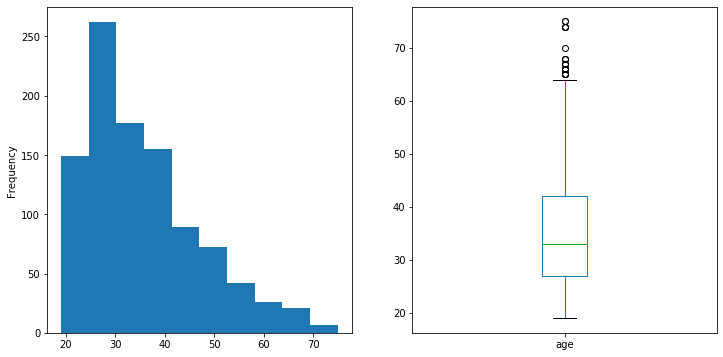

In [55]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['age'].plot(kind='hist', ax=axes[0])
df['age'].plot(kind='box', ax=axes[1])

In [56]:
df['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

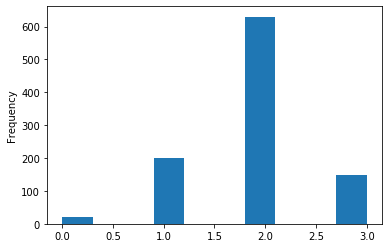

In [57]:
df['job'].plot(kind='hist')

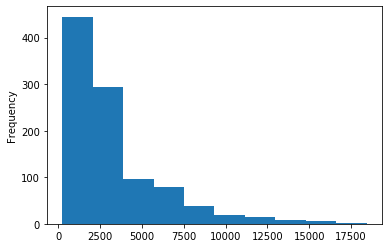

In [58]:
df['creditAmount'].plot(kind='hist')

In [59]:
df['creditAmount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: creditAmount, dtype: float64

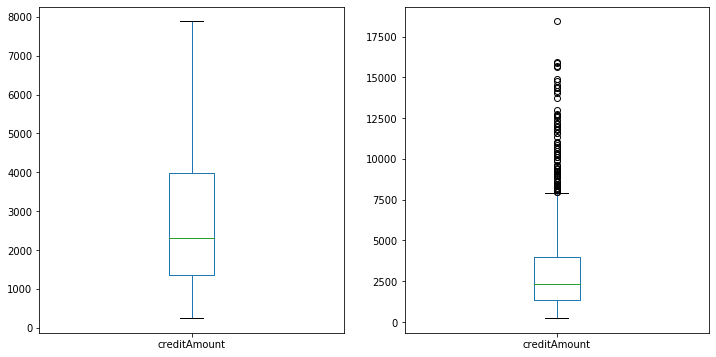

In [60]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
#figure(figsize=(7,5))
df['creditAmount'].plot(kind='box', showfliers=False, ax=axes[0])
df['creditAmount'].plot(kind='box', ax=axes[1])

In [61]:
df['sex'].value_counts()

male      690
female    310
Name: sex, dtype: int64

In [62]:
df['job'].value_counts()

2    630
1    200
3    148
0     22
Name: job, dtype: int64

In [63]:
df['housing'].value_counts()

own     713
rent    179
free    108
Name: housing, dtype: int64

In [64]:
df['savingAccount'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: savingAccount, dtype: int64

In [65]:
df['savingAccount'].isnull().sum() / df.shape[0]

0.183

In [66]:
df['checkingAccount'].value_counts()

little      274
moderate    269
rich         63
Name: checkingAccount, dtype: int64

In [67]:
df['checkingAccount'].isnull().sum() / df.shape[0]

0.394

In [68]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


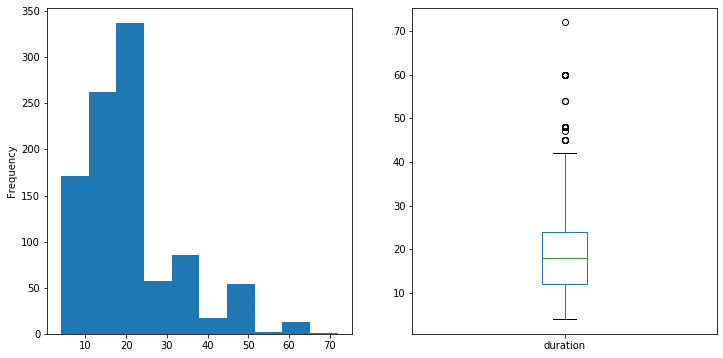

In [69]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['duration'].plot(kind='hist', ax=axes[0])
df['duration'].plot(kind='box', ax=axes[1])

In [70]:
df['purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: purpose, dtype: int64

In [71]:
df['purpose'].isnull().sum() / df.shape[0]

0.0

In [72]:
df['risk'].isnull().sum() / df.shape[0]

0.0

In [73]:
df.isnull().sum()

age                  0
sex                  0
job                  0
housing              0
savingAccount      183
checkingAccount    394
creditAmount         0
duration             0
purpose              0
risk                 0
dtype: int64

Text(0, 0.5, 'Duration')

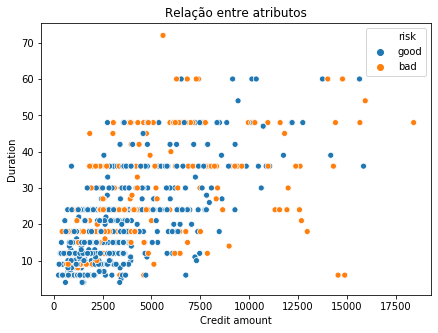

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

import seaborn as sns
x = sns.scatterplot(x='creditAmount', y='duration', data=df, hue='risk')
x.set_title("Relação entre atributos")
x.set_xlabel("Credit amount")
x.set_ylabel("Duration")

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

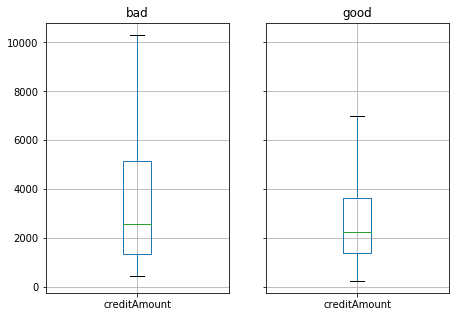

In [75]:
grouped = df[['creditAmount','risk']].groupby('risk')
grouped.boxplot(figsize=(7,5), showfliers=False)

In [76]:
df.shape

(1000, 10)

# Separando parte dos exemplos para validação final

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:9], df['risk'], test_size=0.1, random_state=4)

In [78]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,little,little,2522,30,radio/TV
304,44,male,2,free,quite rich,NaN,10127,48,car
964,22,male,1,own,little,moderate,454,6,repairs
102,24,female,2,own,little,NaN,932,6,radio/TV
867,42,male,2,own,little,NaN,3331,12,furniture/equipment


In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(900, 9)
(900,)
(100, 9)
(100,)


In [80]:
y_train.value_counts()

good    628
bad     272
Name: risk, dtype: int64

In [81]:
y_test.value_counts()

good    72
bad     28
Name: risk, dtype: int64

# Modelagem com algoritmos indutores de árvores de decisão

A atual implementação de árvore de decisão no sklearn (tree.DecisionTreeClassifier()) não consegue trabalhar com dados categóricos. Sendo assim, é necessário transformar os atributos categóricos em numéricos quando houver uma relação de grandeza entre os valores. Caso contrário, vamos simplesmente desconsiderar os atributos.

Por enquanto, não vamos considerar a abordagem de *one hot* ou *get_dummies* pois esta abordagem gera uma tabela com alta dimensionalidade - algo que algoritmos de árvore de decisão não conseguem lidar muito bem.

In [82]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,little,little,2522,30,radio/TV
304,44,male,2,free,quite rich,NaN,10127,48,car
964,22,male,1,own,little,moderate,454,6,repairs
102,24,female,2,own,little,NaN,932,6,radio/TV
867,42,male,2,own,little,NaN,3331,12,furniture/equipment


In [83]:
X_train_ = X_train.drop(columns=['sex','housing','savingAccount','checkingAccount','purpose'])

In [84]:
X_train_

,age,job,creditAmount,duration
239,39,2,2522,30
304,44,2,10127,48
964,22,1,454,6
102,24,2,932,6
867,42,2,3331,12
...,...,...,...,...
897,35,2,1592,12
709,37,1,2118,9
439,26,0,609,12
174,26,2,3414,21


In [85]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train_, y_train)
scores = cross_val_score(model, X_train_, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.69 (+/- 0.02)


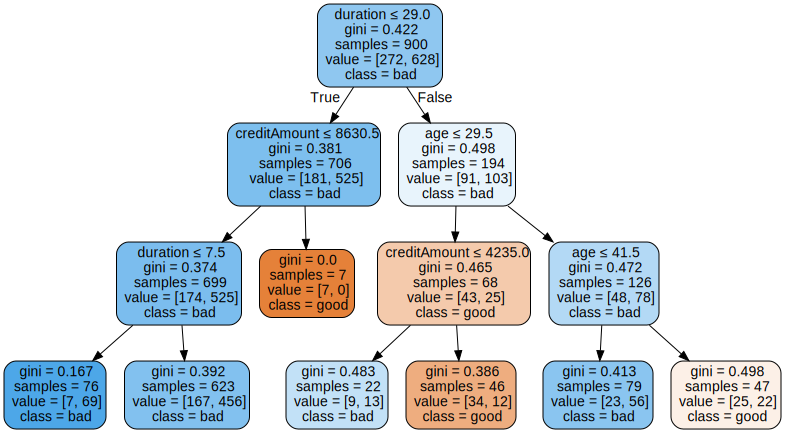

In [86]:
import graphviz
g = tree.export_graphviz(model, out_file=None, 
                      feature_names=X_train_.columns,  
                      class_names=y_train.unique(),  
                      filled=True, rounded=True,  
                      special_characters=True)

graph = graphviz.Source(g) 
graph

In [87]:
from sklearn import tree
for i in [1,2,3,4,5,6,7,8,9,10,None]:
    model = tree.DecisionTreeClassifier(max_depth=i)
    model = model.fit(X_train_, y_train)
    scores = cross_val_score(model, X_train_, y_train, cv=5)
    print("Max depth = "+ str(i)+ " Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Max depth = 1 Accuracy: 0.68 (+/- 0.03)
Max depth = 2 Accuracy: 0.68 (+/- 0.02)
Max depth = 3 Accuracy: 0.69 (+/- 0.02)
Max depth = 4 Accuracy: 0.68 (+/- 0.03)
Max depth = 5 Accuracy: 0.66 (+/- 0.04)
Max depth = 6 Accuracy: 0.68 (+/- 0.02)
Max depth = 7 Accuracy: 0.66 (+/- 0.02)
Max depth = 8 Accuracy: 0.66 (+/- 0.03)
Max depth = 9 Accuracy: 0.65 (+/- 0.02)
Max depth = 10 Accuracy: 0.66 (+/- 0.02)
Max depth = None Accuracy: 0.62 (+/- 0.01)


# Modelando com Knn (Aprendizado baseado em instâncias)

O algoritmo Knn só consegue manipular atributos independentes numéricos. E os mesmos precisam estar normalizados. Por isso, teremos que normalizar (https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc). 

In [88]:
X_train_.head()

,age,job,creditAmount,duration
239,39,2,2522,30
304,44,2,10127,48
964,22,1,454,6
102,24,2,932,6
867,42,2,3331,12


In [89]:
from sklearn import preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train_), 
                              index=X_train_.index, 
                              columns=X_train_.columns
                             )

In [90]:
X_train_scaled.head()

,age,job,creditAmount,duration
239,0.357143,0.666667,0.125014,0.382353
304,0.446429,0.666667,0.543469,0.647059
964,0.053571,0.333333,0.011225,0.029412
102,0.089286,0.666667,0.037526,0.029412
867,0.410714,0.666667,0.169528,0.117647


In [91]:
from sklearn.neighbors import KNeighborsClassifier

for i in [3,5,7,9,25,26,27,28,29,30,31,32,33,34,35,37,39,41,43,45,47,49,51]:
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train_scaled, y_train)
    scores = cross_val_score(modelK, X_train_scaled, y_train, cv=5)
    print("Max depth = "+ str(i)+ " Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Max depth = 3 Accuracy: 0.64 (+/- 0.02)
Max depth = 5 Accuracy: 0.67 (+/- 0.03)
Max depth = 7 Accuracy: 0.69 (+/- 0.03)
Max depth = 9 Accuracy: 0.68 (+/- 0.03)
Max depth = 25 Accuracy: 0.70 (+/- 0.02)
Max depth = 26 Accuracy: 0.69 (+/- 0.02)
Max depth = 27 Accuracy: 0.70 (+/- 0.02)
Max depth = 28 Accuracy: 0.70 (+/- 0.02)
Max depth = 29 Accuracy: 0.70 (+/- 0.01)
Max depth = 30 Accuracy: 0.70 (+/- 0.02)
Max depth = 31 Accuracy: 0.70 (+/- 0.01)
Max depth = 32 Accuracy: 0.69 (+/- 0.01)
Max depth = 33 Accuracy: 0.69 (+/- 0.01)
Max depth = 34 Accuracy: 0.70 (+/- 0.02)
Max depth = 35 Accuracy: 0.70 (+/- 0.01)
Max depth = 37 Accuracy: 0.70 (+/- 0.01)
Max depth = 39 Accuracy: 0.70 (+/- 0.01)
Max depth = 41 Accuracy: 0.70 (+/- 0.01)
Max depth = 43 Accuracy: 0.70 (+/- 0.01)
Max depth = 45 Accuracy: 0.70 (+/- 0.01)
Max depth = 47 Accuracy: 0.70 (+/- 0.01)
Max depth = 49 Accuracy: 0.70 (+/- 0.01)
Max depth = 51 Accuracy: 0.70 (+/- 0.01)


# Modelando com Knn + one hot para todos os atributos categóricos

Por enquanto, vamos desconsiderar os atributos savingAccount e checkingAccount - atributos que possuem valores faltantes.

In [92]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,little,little,2522,30,radio/TV
304,44,male,2,free,quite rich,NaN,10127,48,car
964,22,male,1,own,little,moderate,454,6,repairs
102,24,female,2,own,little,NaN,932,6,radio/TV
867,42,male,2,own,little,NaN,3331,12,furniture/equipment


In [93]:
d_attr = pd.get_dummies(X_train[['sex','housing','purpose']], prefix=['sex','housing','purpose'])

In [94]:
print(d_attr.shape)
print(X_train_scaled.shape)

(900, 13)
(900, 4)


In [95]:
X_train_knn = pd.concat([X_train_scaled, d_attr], axis=1)

In [96]:
X_train_knn.head()

,age,job,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,0.357143,0.666667,0.125014,0.382353,0,1,0,1,0,0,0,0,0,0,1,0,0
304,0.446429,0.666667,0.543469,0.647059,0,1,1,0,0,0,1,0,0,0,0,0,0
964,0.053571,0.333333,0.011225,0.029412,0,1,0,1,0,0,0,0,0,0,0,1,0
102,0.089286,0.666667,0.037526,0.029412,1,0,0,1,0,0,0,0,0,0,1,0,0
867,0.410714,0.666667,0.169528,0.117647,0,1,0,1,0,0,0,0,0,1,0,0,0


In [97]:
X_train_knn.shape

(900, 17)

In [98]:
from sklearn.neighbors import KNeighborsClassifier

for i in [3,5,7,9,25,26,27,28,29,30,31,32,33,34,35,37,39,41,43,45,47,49,51]:
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train_knn, y_train)
    scores = cross_val_score(modelK, X_train_knn, y_train, cv=5)
    print("Max depth = "+ str(i)+ " Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Max depth = 3 Accuracy: 0.64 (+/- 0.02)
Max depth = 5 Accuracy: 0.65 (+/- 0.01)
Max depth = 7 Accuracy: 0.66 (+/- 0.01)
Max depth = 9 Accuracy: 0.68 (+/- 0.02)
Max depth = 25 Accuracy: 0.69 (+/- 0.01)
Max depth = 26 Accuracy: 0.69 (+/- 0.01)
Max depth = 27 Accuracy: 0.69 (+/- 0.01)
Max depth = 28 Accuracy: 0.69 (+/- 0.02)
Max depth = 29 Accuracy: 0.69 (+/- 0.01)
Max depth = 30 Accuracy: 0.69 (+/- 0.01)
Max depth = 31 Accuracy: 0.69 (+/- 0.01)
Max depth = 32 Accuracy: 0.69 (+/- 0.01)
Max depth = 33 Accuracy: 0.69 (+/- 0.01)
Max depth = 34 Accuracy: 0.68 (+/- 0.01)
Max depth = 35 Accuracy: 0.69 (+/- 0.01)
Max depth = 37 Accuracy: 0.69 (+/- 0.01)
Max depth = 39 Accuracy: 0.69 (+/- 0.01)
Max depth = 41 Accuracy: 0.69 (+/- 0.01)
Max depth = 43 Accuracy: 0.69 (+/- 0.00)
Max depth = 45 Accuracy: 0.69 (+/- 0.01)
Max depth = 47 Accuracy: 0.69 (+/- 0.01)
Max depth = 49 Accuracy: 0.69 (+/- 0.01)
Max depth = 51 Accuracy: 0.70 (+/- 0.00)


# Usando ensemble models (RandomForest)

Vamos usar o mesmo pré-processamento utilizado para o algoritmo Knn

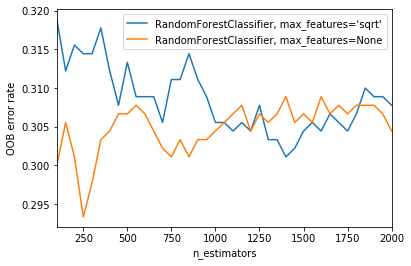

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 2000
step = 50

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators+step, step):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_knn, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()